# Get the data

In [ ]:
!gdown --id 1cg5jSHvZudOCvwTAlHXnnIbwjrtQLYga

Downloading...
From: https://drive.google.com/uc?id=1cg5jSHvZudOCvwTAlHXnnIbwjrtQLYga
To: /content/super-ai-engineer-2021-font-recognition.zip
100% 1.14G/1.14G [00:07<00:00, 155MB/s]


In [ ]:
!unzip -q /content/super-ai-engineer-2021-font-recognition.zip

# Import

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import os
from pathlib import Path
import cv2

In [ ]:
train_path = Path('/content/train')
train_set1_path = str(train_path) + "/set1/"
train_set2_path = str(train_path) + "/set2/"
lst_dir_set1 = sorted(os.listdir(train_set1_path))
lst_dir_set2 = sorted(os.listdir(train_set2_path))

In [ ]:
lst_dir_set1[:10]

['1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005', '1006']

# Get file path of images and json files

In [ ]:
images_path = []
jsons_path = []

for i in lst_dir_set1:
    path = Path(train_set1_path + i)
    file_path = os.listdir(path)
    
    json_path = str(path) + "/" + file_path[0]
    img_path = str(path) + "/" + file_path[1]
    
    jsons_path.append(json_path)
    images_path.append(img_path)

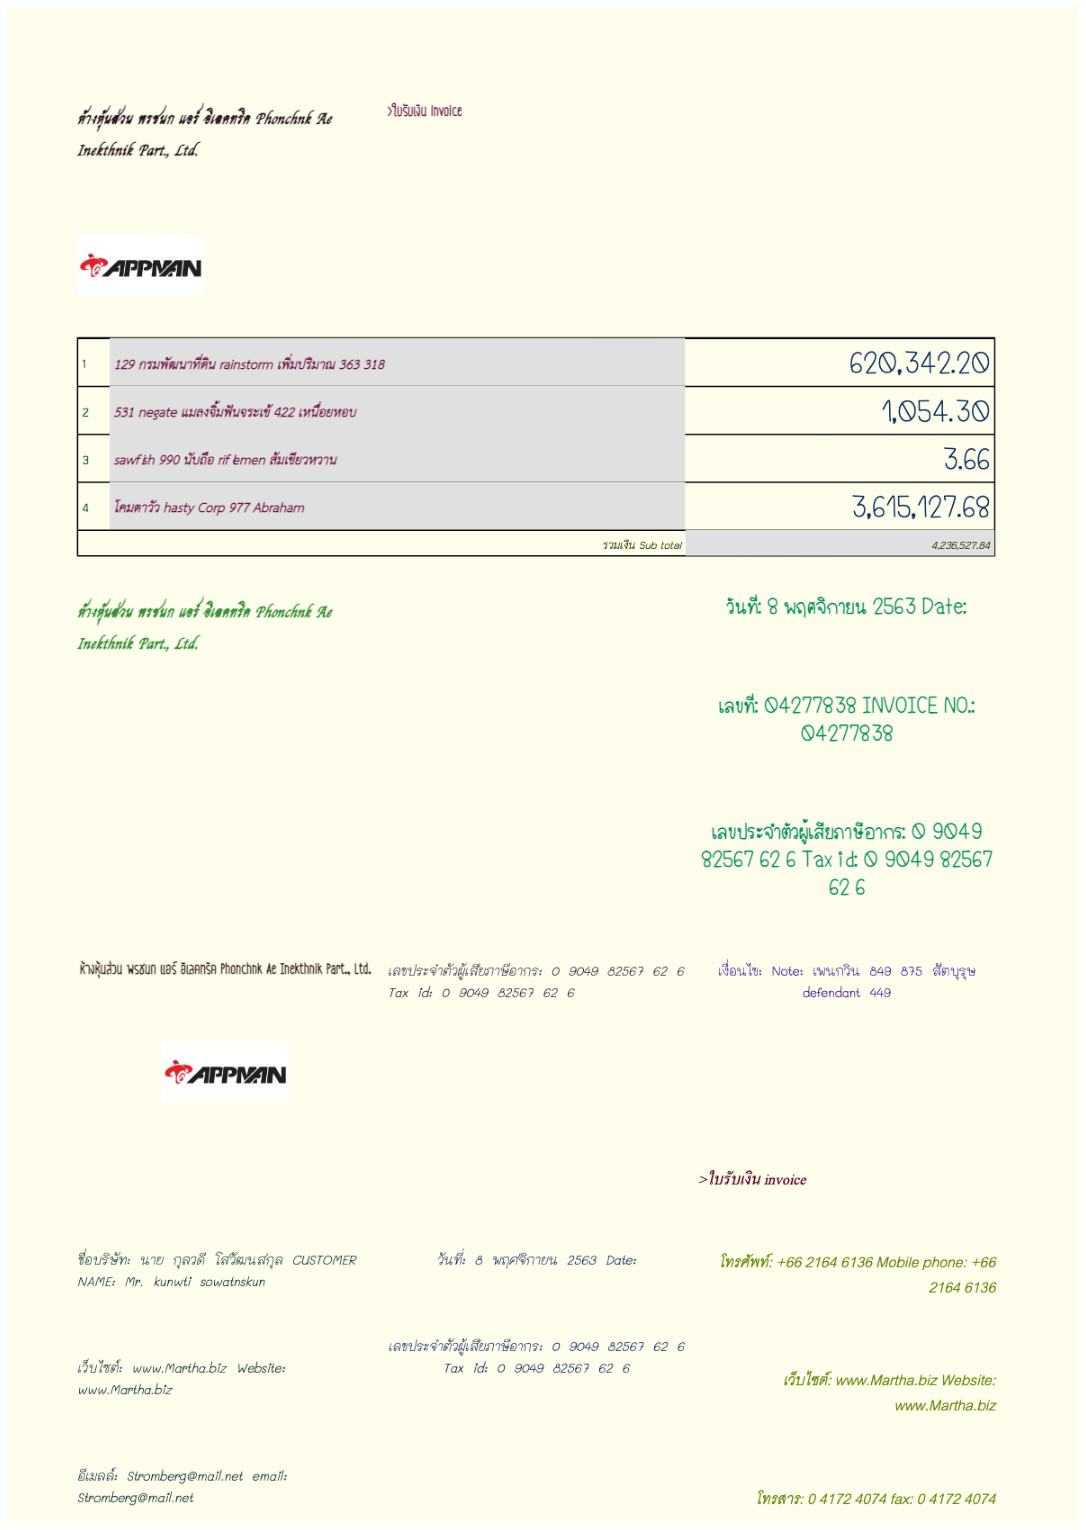

In [ ]:
def display_image_in_actual_size(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

display_image_in_actual_size(images_path[0])

# Read json file

In [ ]:
import json

json_data = []
for i in jsons_path:
    f = open(i)
    data = json.load(f)
    json_data.append(data)

In [ ]:
len(json_data)

3000

In [ ]:
len(json_data[0])

34

In [ ]:
json_data[0]

[{'parentId': 'cefabe1b',
  'parentWord': 'ห้างหุ้นส่วน พรชนก แอร์ อิเลคทริค\nPhonchnk Ae Inekthnik Part., Ltd.',
  'rect': {'height': 62.01604056358339,
   'width': 284.93588829785585,
   'x': 77.62612998336553,
   'y': 106.20598754882813},
  'style': {'fontFamily': 'TH_Charm_of_AU',
   'fontSize': '16px',
   'fontStyle': 'italic',
   'fontVarient': 'normal',
   'fontWeight': 'bold'},
  'text': 'ห้างหุ้นส่วน พรชนก แอร์ อิเลคทริค\nPhonchnk Ae Inekthnik Part., Ltd.'},
 {'parentId': '7bfac6b8',
  'parentWord': '>ใบรับเงิน\ninvoice',
  'rect': {'height': 15.328125,
   'width': 82.93379463627934,
   'x': 422.85148962065574,
   'y': 106.33828125000001},
  'style': {'fontFamily': 'FC_Knomphing_Regular',
   'fontSize': '16px',
   'fontStyle': 'normal',
   'fontVarient': 'normal',
   'fontWeight': 'bold'},
  'text': '>ใบรับเงิน\ninvoice'},
 {'parentId': 'a368ca3e',
  'parentWord': 'ห้างหุ้นส่วน พรชนก แอร์ อิเลคทริค\nPhonchnk Ae Inekthnik Part., Ltd.',
  'rect': {'height': 62.016040563583374,
 

# create folders to put all the files in

In [ ]:
os.mkdir("/content/outputs")
os.mkdir("/content/outputs/set1")

In [ ]:
len(json_data[0])

34

In [ ]:
import os
 
dir = '/content/outputs/set1/1'
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

In [ ]:
from PIL import Image


count = 0

# for i in range(len(json_data)):
for i in range(len(json_data)):
  save_path = "/content/outputs/set1"
  try:
    os.mkdir(save_path + "/{}".format(lst_dir_set1[i]))
  except:
    print("")

  for j in range(len(json_data[i])):
    # read image elements in one image
    img = cv2.imread(images_path[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # specify cropped area
    x1 = round(json_data[i][j]['rect']['x'])
    x2 = round(x1 + json_data[i][j]['rect']['width'])
    y1 = round(json_data[i][j]['rect']['y'])
    y2 = round(y1 + json_data[i][j]['rect']['height'])
    print('original {}'.format(img.shape) + " (x1,y1,x2,y2) = {}, {}, {}, {}".format(x1, y1, x2, y2))
    img = img[y1:y2,x1:x2]
    print(img.shape)

    filename = save_path + "/{}".format(lst_dir_set1[i]) + "/image_{}_element_{}.png".format(i, count)
    # save image from numpy array
    try:
      cv2.imwrite(filename, img)
    except:
      print('', end='')
    # im.save(save_path + "/image_{}_element_{}.png".format(i, count))
    count = count + 1

Streaming output truncated to the last 5000 lines.
original (1531, 1191, 3) (x1,y1,x2,y2) = 778, 630, 790, 639
(9, 12, 3)
original (1531, 1191, 3) (x1,y1,x2,y2) = 886, 628, 918, 641
(13, 32, 3)
original (1531, 1191, 3) (x1,y1,x2,y2) = 1039, 624, 1087, 637
(13, 48, 3)
original (1531, 1191, 3) (x1,y1,x2,y2) = 93, 676, 124, 703
(27, 31, 3)
original (1531, 1191, 3) (x1,y1,x2,y2) = 160, 677, 467, 700
(23, 307, 3)
original (1531, 1191, 3) (x1,y1,x2,y2) = 781, 688, 787, 697
(9, 6, 3)
original (1531, 1191, 3) (x1,y1,x2,y2) = 865, 685, 918, 698
(13, 53, 3)
original (1531, 1191, 3) (x1,y1,x2,y2) = 1041, 681, 1088, 694
(13, 47, 3)
original (1531, 1191, 3) (x1,y1,x2,y2) = 93, 733, 127, 761
(28, 34, 3)
original (1531, 1191, 3) (x1,y1,x2,y2) = 160, 733, 521, 762
(29, 361, 3)
original (1531, 1191, 3) (x1,y1,x2,y2) = 778, 745, 790, 754
(9, 12, 3)
original (1531, 1191, 3) (x1,y1,x2,y2) = 885, 743, 918, 756
(13, 33, 3)
original (1531, 1191, 3) (x1,y1,x2,y2) = 1049, 739, 1088, 752
(13, 39, 3)
original (1

In [ ]:
len(os.listdir('/content/outputs/set1'))

3001

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
import shutil
from shutil import make_archive

def make_archive(source, destination, format='zip'):
    import os
    import shutil
    from shutil import make_archive
    base, name = os.path.split(destination)
    archive_from = os.path.dirname(source)
    archive_to = os.path.basename(source.strip(os.sep))
    print(f'Source: {source}\nDestination: {destination}\nArchive From: {archive_from}\nArchive To: {archive_to}\n')
    shutil.make_archive(name, format, archive_from, archive_to)
    shutil.move('%s.%s' % (name, format), destination)

make_archive('/content/outputs/set1', '/content/outputs/set1')

Source: /content/outputs/set1
Destination: /content/outputs/set1
Archive From: /content/outputs
Archive To: set1



In [ ]:
import shutil
shutil.make_archive('/content/gdrive/MyDrive', 'zip', '/content/outputs/set1')

In [ ]:
jsons_path[:5]

['/content/train/set1/1/gt_text.json',
 '/content/train/set1/10/gt_text.json',
 '/content/train/set1/100/gt_text.json',
 '/content/train/set1/1000/gt_text.json',
 '/content/train/set1/1001/gt_text.json']

In [ ]:
json_data[0][0]

{'parentId': 'cefabe1b',
 'parentWord': 'ห้างหุ้นส่วน พรชนก แอร์ อิเลคทริค\nPhonchnk Ae Inekthnik Part., Ltd.',
 'rect': {'height': 62.01604056358339,
  'width': 284.93588829785585,
  'x': 77.62612998336553,
  'y': 106.20598754882813},
 'style': {'fontFamily': 'TH_Charm_of_AU',
  'fontSize': '16px',
  'fontStyle': 'italic',
  'fontVarient': 'normal',
  'fontWeight': 'bold'},
 'text': 'ห้างหุ้นส่วน พรชนก แอร์ อิเลคทริค\nPhonchnk Ae Inekthnik Part., Ltd.'}